# Fandango Ratings Bias Analysis

**Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analysing Fandango's Listed Ratings vs Authentic User Ratings

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Creating a scatter plot to explore the correlation between movie ratings and number of votes: investigating the impact of popularity on ratings**

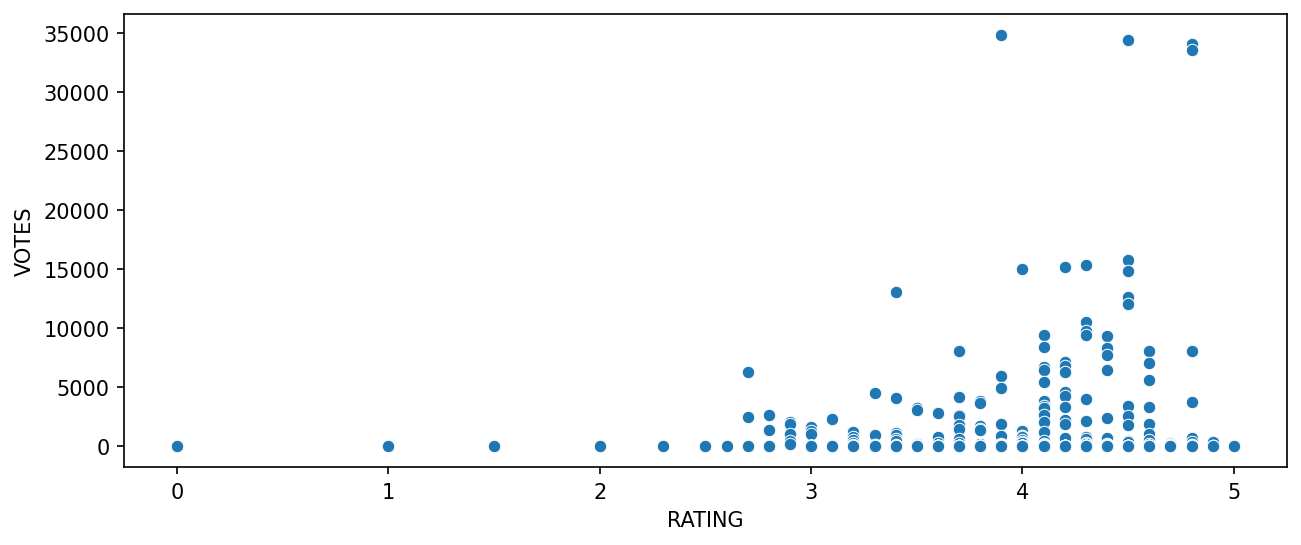

In [6]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=fandango,x='RATING',y='VOTES')
plt.savefig("correlation_movies_rating_votes.png")

**Calculating the correlation coefficient to quantify the relationship between movie ratings and number of votes**

In [7]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Creating a new column by extracting the year from the title strings and assigning it to the 'YEAR' column for easy reference and analysis**

In [8]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1])

In [9]:
fandango['YEAR'].value_counts()

2015)    478
2014)     23
2016)      1
1964)      1
2012)      1
Name: YEAR, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

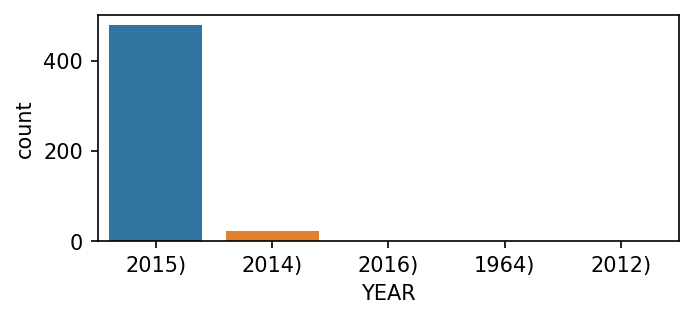

In [10]:
plt.figure(figsize=(5,2),dpi=150)
sns.countplot(data=fandango,x='YEAR')

**Identifying the top 10 movies with the highest number of votes for further analysis**

In [11]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014)
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015)
7,Minions (2015),4.0,4.0,14998,2015)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015)
9,Into the Woods (2014),3.5,3.4,13055,2014)


**Creating a new DataFrame by filtering out movies with zero votes to retain only the reviewed ones**

In [12]:
no_votes = fandango['VOTES']==0 
no_votes.sum()

69

In [13]:
fan_reviewed = fandango[fandango['VOTES']>0]

**Creating a KDE plot to display the distribution of displayed ratings (STARS) versus true ratings from votes (RATING)**

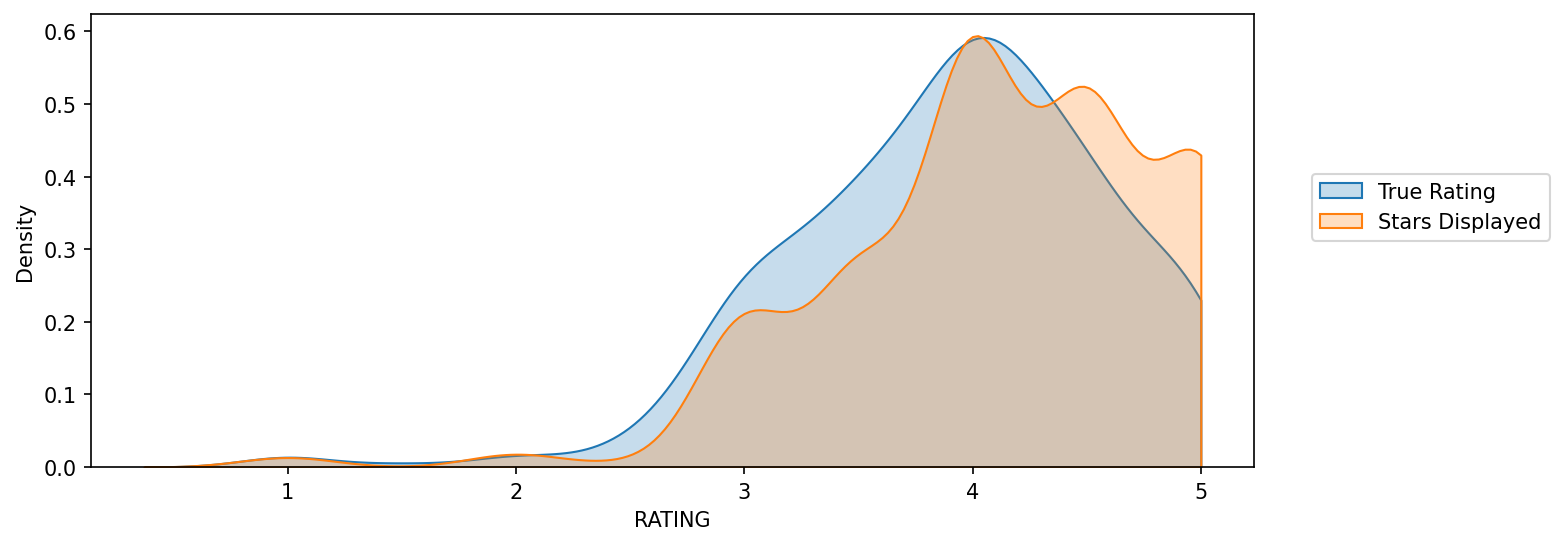

In [14]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=fan_reviewed,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fan_reviewed,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')

plt.legend(loc=(1.05,0.5))
plt.savefig('stars_vs_true_ratings_distribution.png')

**Creating a new column to calculate the difference between displayed STARS and true RATING**

In [15]:
fan_reviewed["STARS_DIFF"] = fan_reviewed['STARS'] - fan_reviewed['RATING'] 
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)

C:\Users\aysen\AppData\Local\Temp/ipykernel_24160/1515829454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed["STARS_DIFF"] = fan_reviewed['STARS'] - fan_reviewed['RATING']
C:\Users\aysen\AppData\Local\Temp/ipykernel_24160/1515829454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)


In [16]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0
2,American Sniper (2015),5.0,4.8,34085,2015),0.2
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2
4,Inside Out (2015),4.5,4.5,15749,2015),0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015),0.0
431,The Intern (2015),5.0,5.0,1,2015),0.0
432,The Park Bench (2015),5.0,5.0,1,2015),0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015),0.0


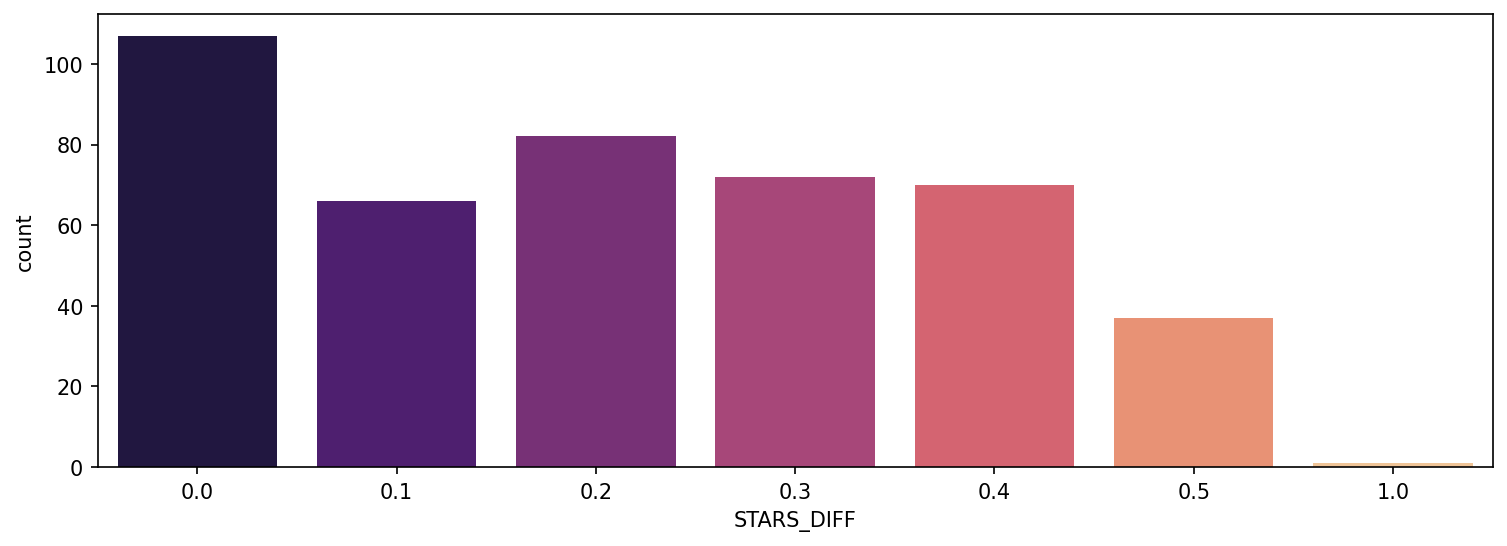

In [17]:
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(data=fan_reviewed,x='STARS_DIFF',palette='magma')
plt.savefig('difference_occurrence_count_plot.png')

# 2. Comparison of Fandango ratings with other sites

In [18]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [19]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [20]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [21]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


# Rotten Tomatoes

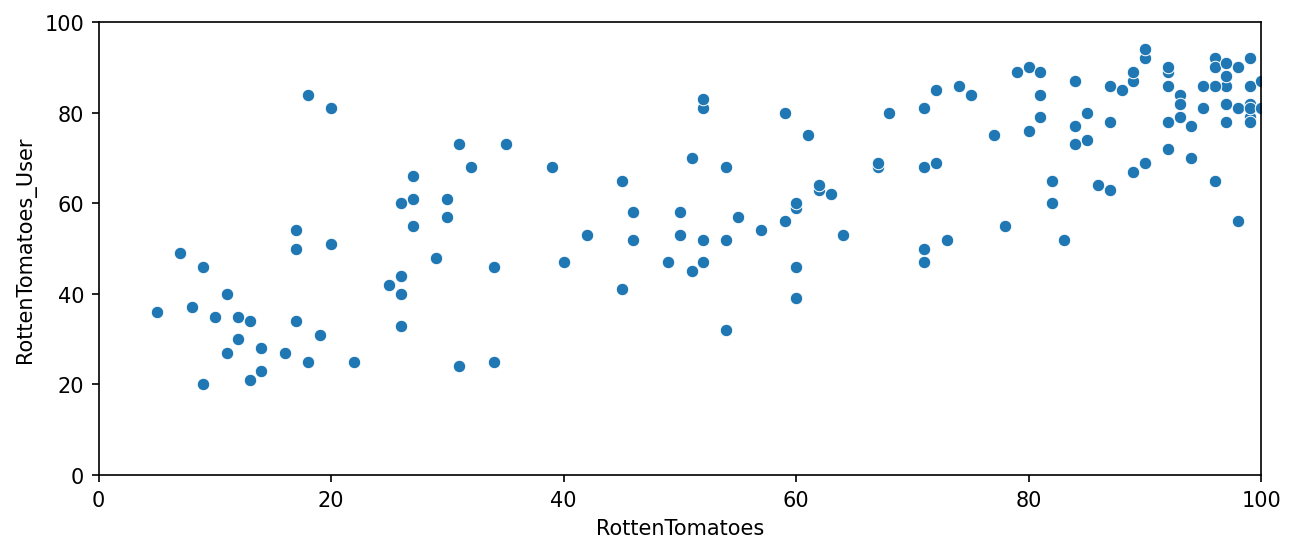

In [22]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)
plt.savefig('rotten_tomatoes_correlation_plot.png')

In [23]:
all_sites['Rotten_Diff']  = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [24]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

**Plotting the distribution of differences between RT Critics Score and RT User Score, including negative values. Use either KDE or histograms to visualise this distribution**

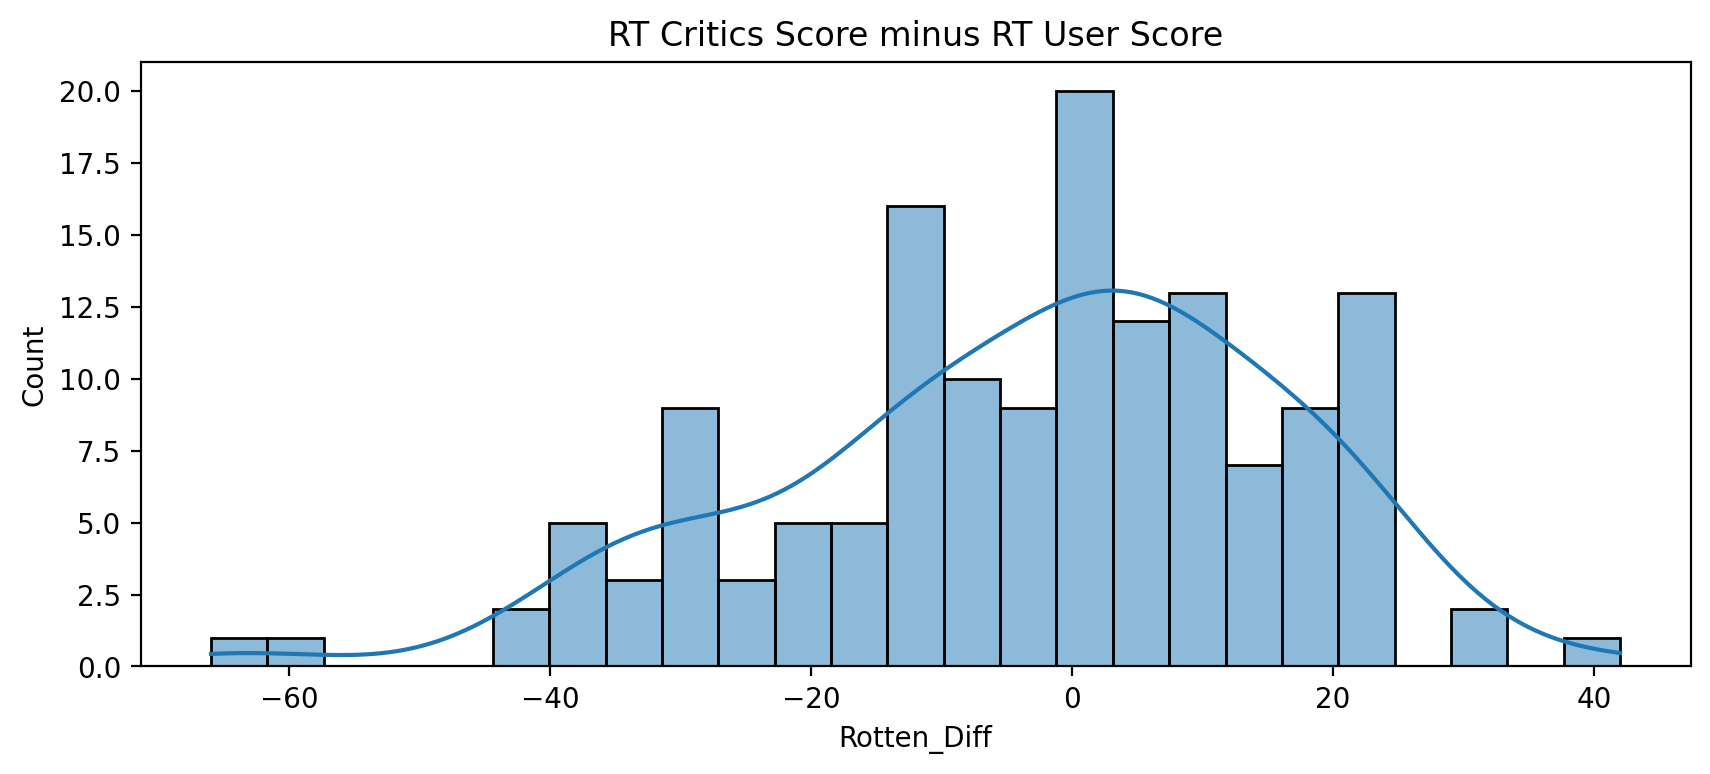

In [25]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites,x='Rotten_Diff',kde=True,bins=25)
plt.title("RT Critics Score minus RT User Score")
plt.savefig('rt_critics_vs_users_difference_distribution.png')

**Plotting the distribution of the absolute value differences between Critics and Users on Rotten Tomatoes**

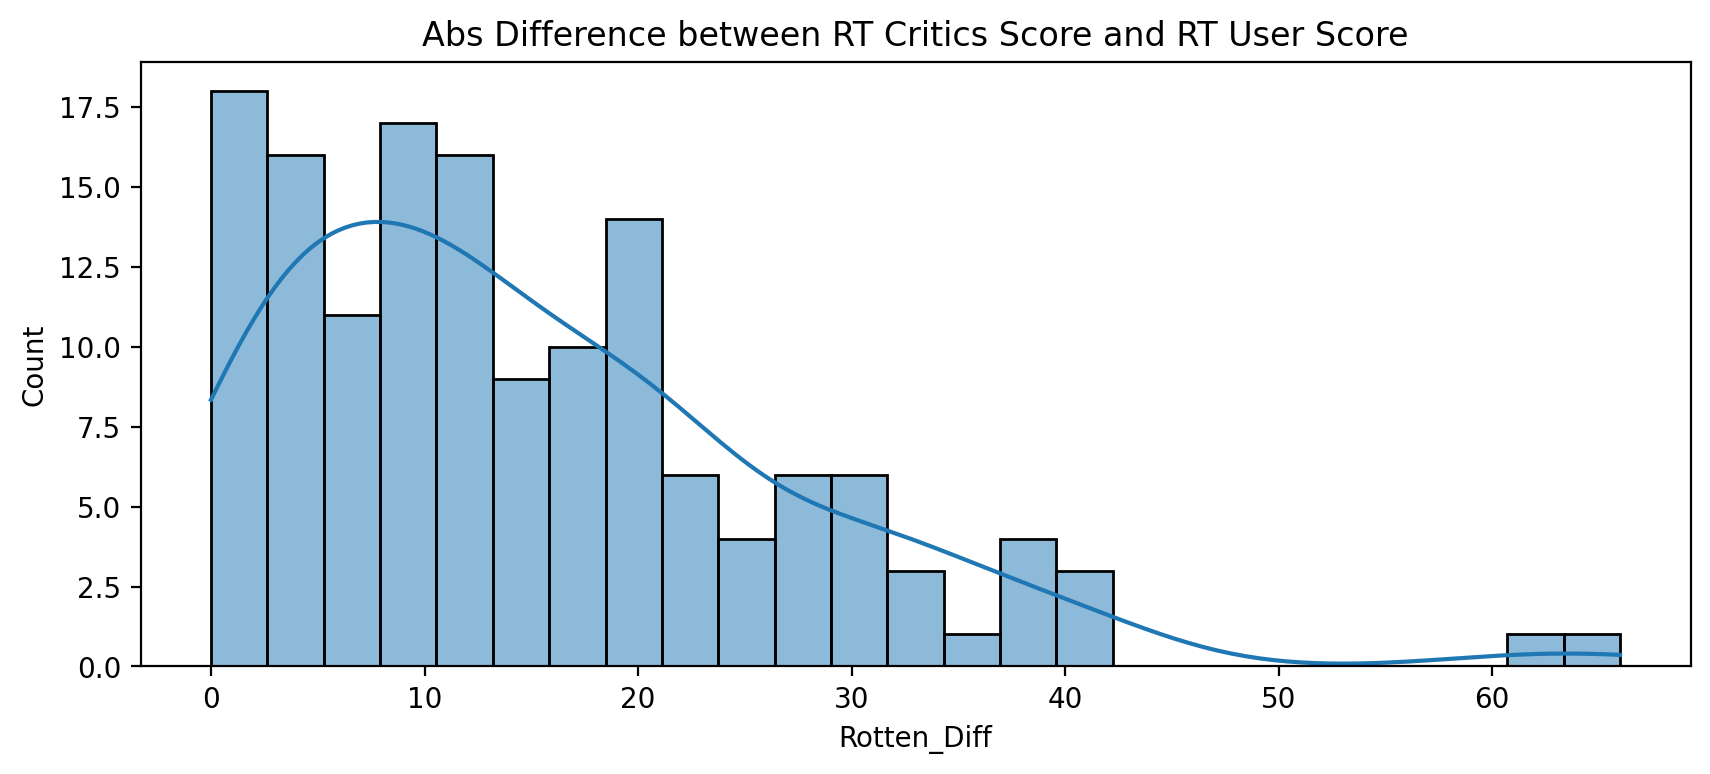

In [26]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs),bins=25,kde=True)
plt.title("Abs Difference between RT Critics Score and RT User Score")
plt.savefig('absolute_difference_rt_critics_vs_users.png')

In [27]:
print("Users Love but Critics Hate")
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Users Love but Critics Hate


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [28]:
print("Critics love, but Users Hate")
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Critics love, but Users Hate


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


# MetaCritic

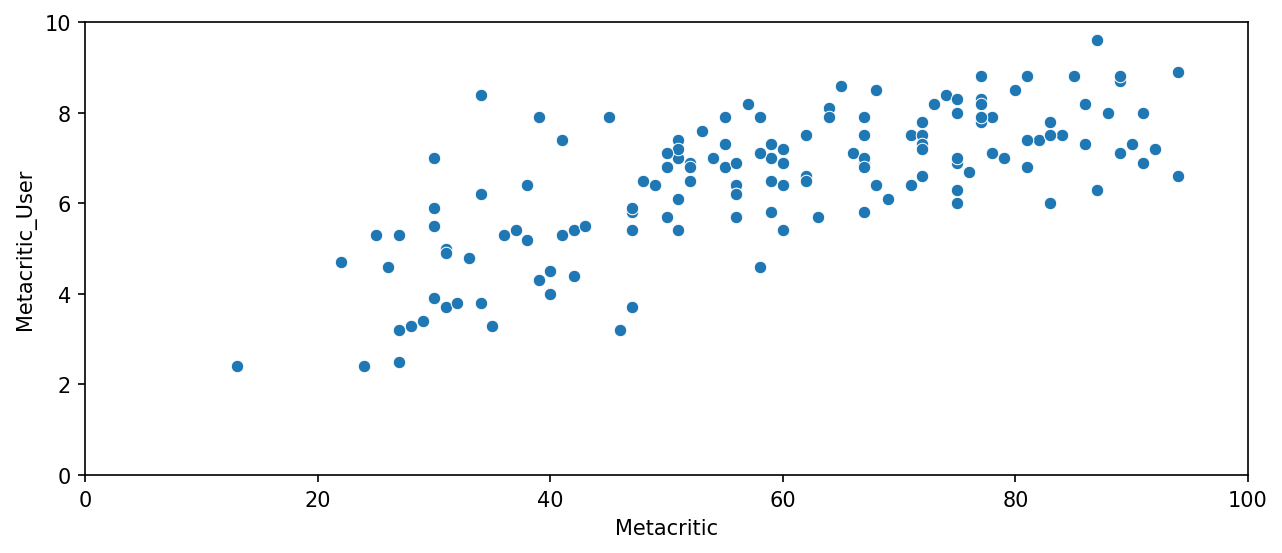

In [29]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)
plt.savefig('metacritics_correlation_plot.png')

# MetaCritic vs IMDB

**Create a scatter plot to visualise the relationship between vote counts on MetaCritic and vote counts on IMDB**

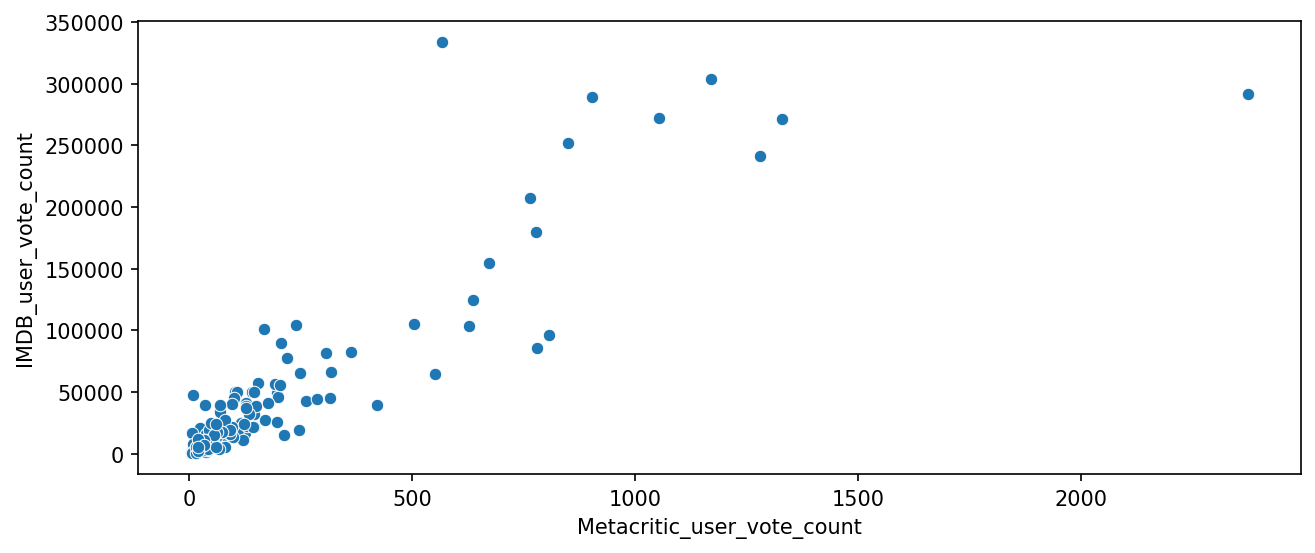

In [30]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')
plt.savefig('metacritic_vs_imdb_votes_scatterplot.png')

**Notice there are two outliers in this scatter plot. One of these is a movie with the highest vote count on IMDB but only around 500 ratings on Metacritic. Identifying this movie**

In [31]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [32]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


# Fandango scores compared to all sites

In [33]:
df = pd.merge(fandango,all_sites,on='FILM',how='inner')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [35]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8


**RT, Metacritic, and IMDB scores do not use a 0-5 star scale like Fandango. To ensure a fair comparison, we must normalize these values so they all fall within the 0-5 star range, maintaining the relationships between reviews.**

**Create new normalized columns for all ratings, ensuring they align with the 0-5 star range used by Fandango. Multiple methods can be applied to achieve this normalization. Choose an approach that preserves the original relationships between the scores.**

In [36]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']/20,1)

In [37]:
df['Meta_Norm'] =  np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1)

In [38]:
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [39]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**Now creating a norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table**

In [40]:
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


**Creating a plot comparing the distributions of normalized ratings across all sites**

In [41]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

C:\Users\aysen\AppData\Local\Temp/ipykernel_24160/191327130.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


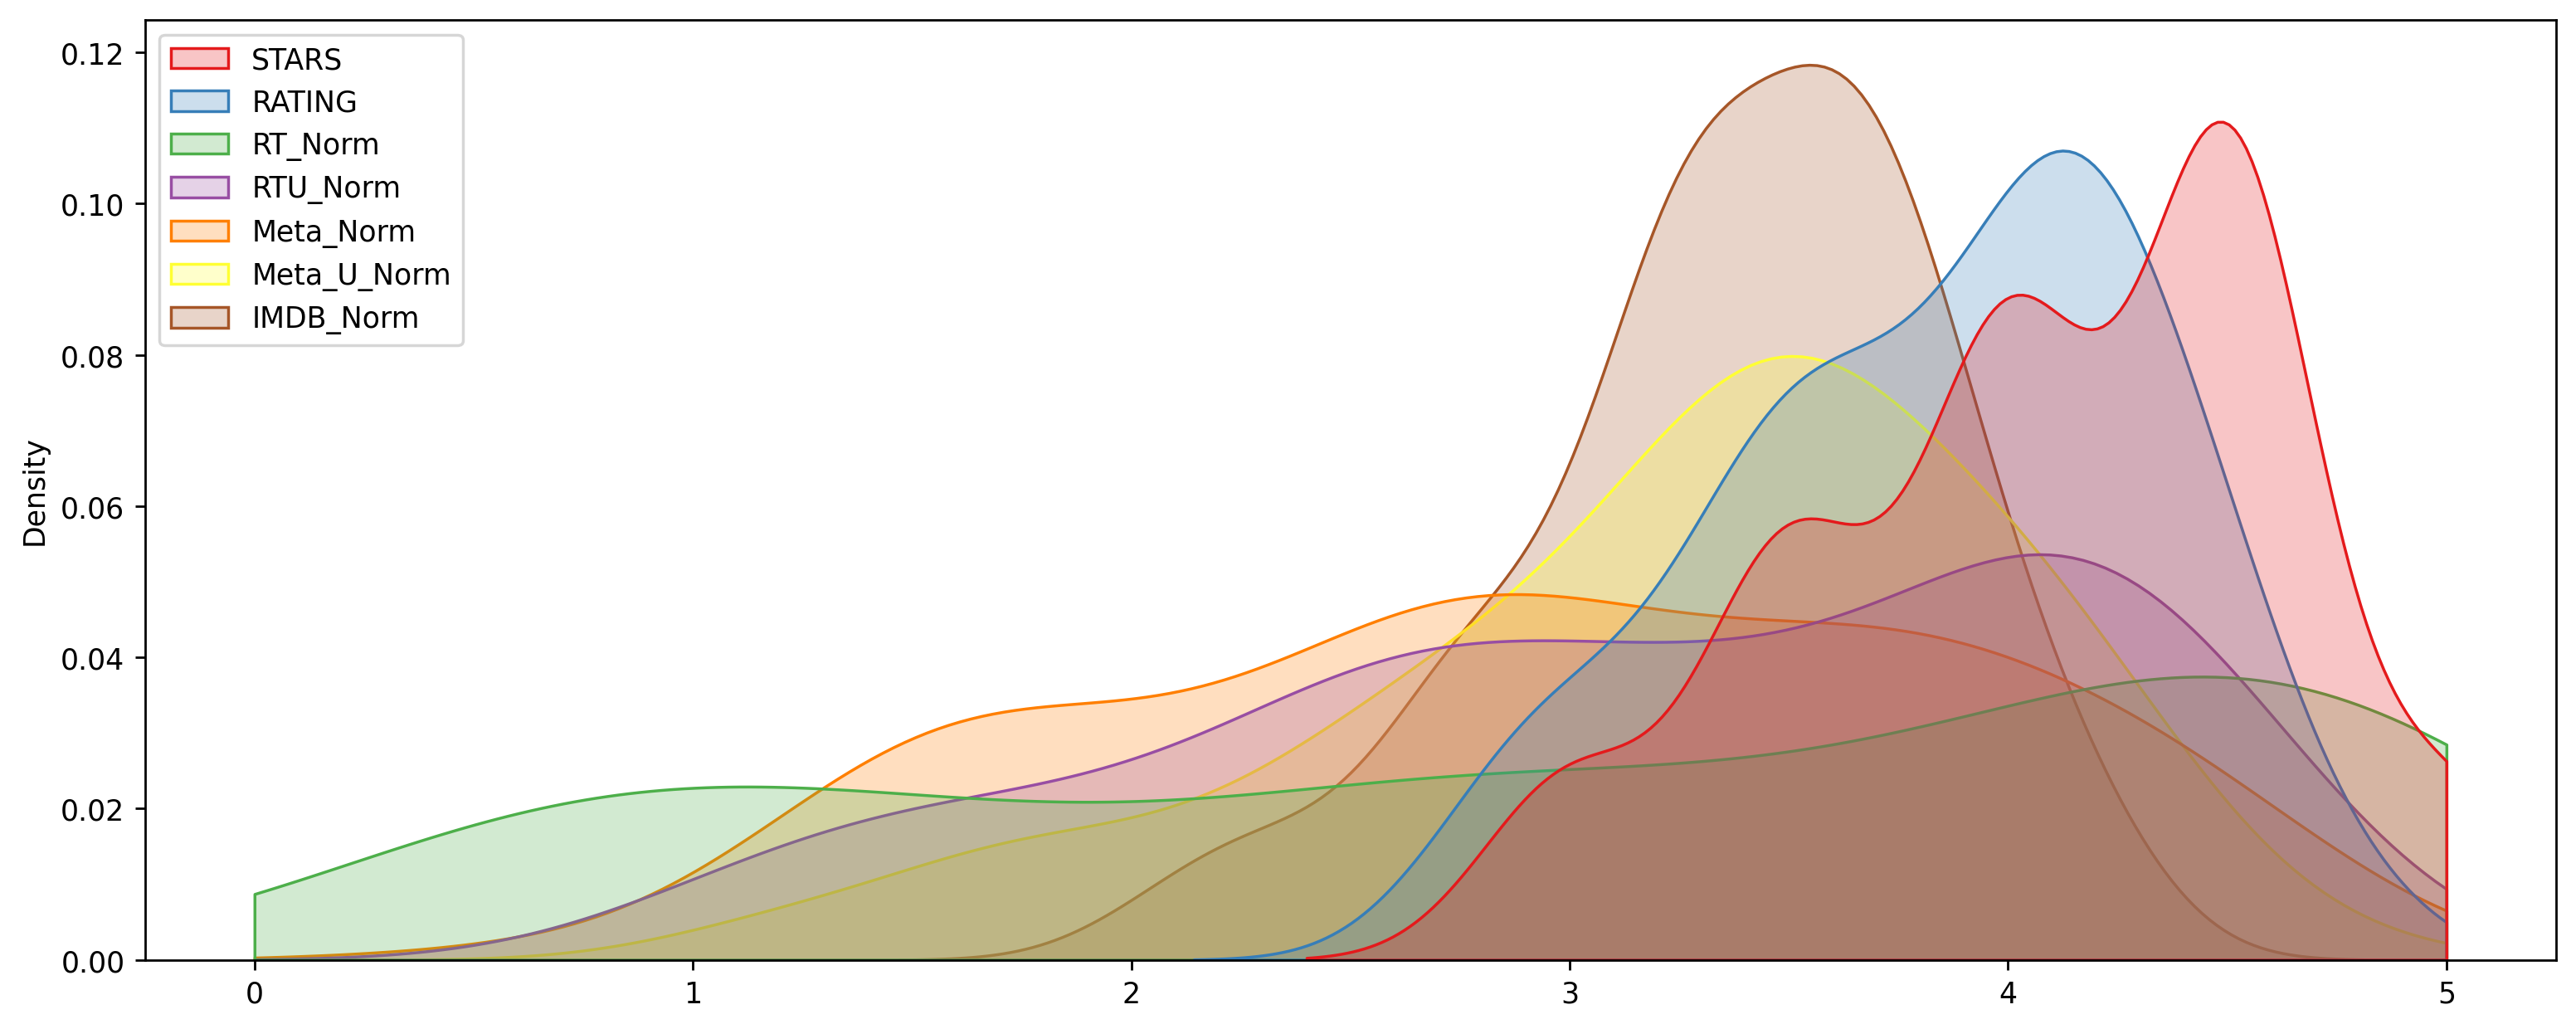

In [42]:
fig, ax = plt.subplots(figsize=(15,6),dpi=250)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")
plt.savefig('normalized_ratings_distribution_comparison.png')

**Key Observation:** Fandango's distribution appears skewed compared to other platforms.